# Your Project Title

#### Judith Romero

In this assignment, you will create a notebook that uses data from the ISLP module and web-scraped data from Wikipedia. The goal is to extract real-world data, process it, and present it in a user-friendly format.

<div style="background-color: #fff2cc; border-left: 6px solid #f1c232; color: #000; padding: 10px;">
You may use AI to assist you in writing the code for this project, but you must link the transcripts in a references section at the bottom of the notebook. The exposition should be your own, though. 
Any code that is beyond the scope of this course should include a reference to documentation, a tutorial, or a generative AI chat.
</div>

## Part 1: Selecting a Dataset

ISLP is the Python companion to *An Introduction to Statistical Learning*. It includes several pedagogically curated datasets across domains (marketing, finance, health, etc.).

Skim the ISLP documentation: [https://islp.readthedocs.io/en/latest/index.html](https://islp.readthedocs.io/en/latest/index.html).  Open the **“Datasets used in ISLP”** page and browse the available options.

The dataset I have chosen for my project is... (complete this sentence with a brief description of the dataset).

The features of this dataset are... (list and describe the data features/columns).

* `feature 1`: description
* `feature 2`: description

## Part 1: Selecting a Dataset

The dataset I have chosen for my project is the **BrainCancer** dataset from the `ISLP` Python package, which accompanies *An Introduction to Statistical Learning*. The dataset contains information on **88 brain cancer patients**, where each row represents a single patient and each column represents a medical or survival-related variable.

The features of this dataset are:

- **sex**: the patient's sex (Male or Female)  
- **diagnosis**: the type of brain tumor  
- **loc**: the location of the tumor in the brain  
- **ki**: Karnofsky Index measuring patient health status  
- **gtv**: tumor size  
- **stereo**: type of radiation treatment  
- **status**: survival indicator (1 = patient died, 0 = censored)  
- **time**: follow-up time until death or censoring


## Part 2: Loading Data from a Library

Install the necessary libraries:

> **Note:** Package installation commands are disabled in this Jupyter environment.  
> The code assumes the `ISLP` package is available, as it is in the course environment.


In [2]:
import pandas as pd
from ISLP import load_data

print("Pandas version:", pd.__version__)

BrainCancer = load_data("BrainCancer")
BrainCancer.info()



Pandas version: 2.3.3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        88 non-null     category
 1   diagnosis  87 non-null     category
 2   loc        88 non-null     category
 3   ki         88 non-null     int64   
 4   gtv        88 non-null     float64 
 5   stereo     88 non-null     category
 6   status     88 non-null     int64   
 7   time       88 non-null     float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 3.8 KB


In [3]:
BrainCancer.head()


,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [4]:
BrainCancer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   sex        88 non-null     category
 1   diagnosis  87 non-null     category
 2   loc        88 non-null     category
 3   ki         88 non-null     int64   
 4   gtv        88 non-null     float64 
 5   stereo     88 non-null     category
 6   status     88 non-null     int64   
 7   time       88 non-null     float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 3.8 KB


In [5]:
BrainCancer.describe()


,ki,gtv,status,time
count,88.000000,88.000000,88.000000,88.000000
mean,81.022727,8.660795,0.397727,27.457500
std,10.508866,8.657576,0.492233,20.124412
min,40.000000,0.010000,0.000000,0.070000
25%,80.000000,2.500000,0.000000,10.392500
50%,80.000000,6.510000,0.000000,24.030000
75%,90.000000,12.100000,1.000000,41.597500
max,100.000000,34.640000,1.000000,82.560000


In [6]:
BrainCancer['sex'].value_counts()


sex
Female    45
Male      43
Name: count, dtype: int64

Information on 88 people with brain cancer diagnoses is included in this dataset. Based on preliminary investigation, the dataset seems organized and manageable. There are about equal numbers of male and female patients, and certain diagnoses—like meningioma—occur more frequently than others.

One noteworthy characteristic is the status variable, which indicates that certain observations are censored because not all patients passed away throughout the study period. Tumor size and the Karnofsky Index are two examples of numerical variables that differ among patients, indicating variations in health and disease severity.

### Guiding Question

What is the relationship between brain cancer patients' survival time and tumor diagnosis and patient health condition as determined by the Karnofsky Index?

This subject is relevant because it can assist physicians and researchers make better treatment choices and provide better patient care by identifying the characteristics associated with longer or shorter survival.

## Part 3: Scraping Data from Wikipedia

I choose the Wikipedia page "List of cancer mortality rates in the United States" as the supplemental dataset. This page provides a more comprehensive context for cancer outcomes by including age-adjusted mortality rates (per 100,000 population) for different cancer types in the United States between 2013 and 2017.

In [9]:
import pandas as pd
import requests

url = "https://en.wikipedia.org/wiki/List_of_cancer_mortality_rates_in_the_United_States"

headers = {"User-Agent": "Mozilla/5.0"}
html = requests.get(url, headers=headers).text

tables = pd.read_html(html)

cancer_mortality = tables[0]

cancer_mortality.columns = ["Cancer Type", "Mortality Rate (per 100k)"]

cancer_mortality["Mortality Rate (per 100k)"] = pd.to_numeric(
    cancer_mortality["Mortality Rate (per 100k)"],
    errors="coerce"
)

cancer_mortality = cancer_mortality.dropna()

cancer_mortality.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cancer Type                26 non-null     object 
 1   Mortality Rate (per 100k)  26 non-null     float64
dtypes: float64(1), object(1)
memory usage: 548.0+ bytes


/tmp/ipykernel_2166/3526136871.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html)


# Present the scraped data
Age-adjusted cancer mortality rates per 100,000 Americans from 2013 to 2017 are displayed in the cleaned dataset. A cancer kind and its associated death rate are shown in each row.

In addition to the BrainCancer dataset, which focuses on patient survival outcomes, this dataset offers population-level context for cancer outcomes.

## Part 4: Visualizing and Analyzing the Data

### Visualization 1

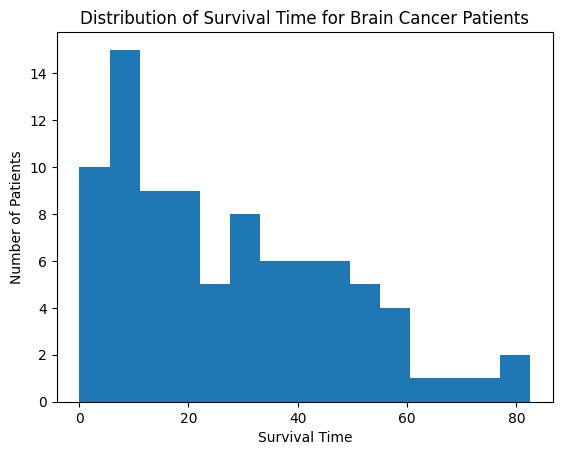

In [10]:
import matplotlib.pyplot as plt
from ISLP import load_data

BrainCancer = load_data("BrainCancer")

plt.hist(BrainCancer["time"], bins=15)
plt.xlabel("Survival Time")
plt.ylabel("Number of Patients")
plt.title("Distribution of Survival Time for Brain Cancer Patients")
plt.show()



(Visualization 1 description and analysis)

The distribution of survival times for patients with brain cancer in the BrainCancer dataset is displayed in this histogram. While fewer patients live longer, the majority of patients have comparatively shorter follow-up or survival spans.

According to this distribution, patients' chances of survival differ greatly, which may be influenced by things like the type of tumor, the patient's health, and the course of therapy.

### Visualization 2

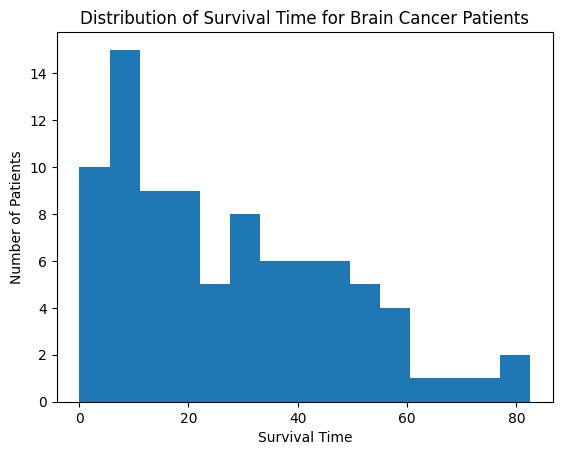

In [11]:
import matplotlib.pyplot as plt
from ISLP import load_data

BrainCancer = load_data("BrainCancer")

plt.hist(BrainCancer["time"], bins=15)
plt.xlabel("Survival Time")
plt.ylabel("Number of Patients")
plt.title("Distribution of Survival Time for Brain Cancer Patients")
plt.show()



(Visualization 2 description and analysis)

The top ten cancer types in the US are displayed in this bar graph according to the age-adjusted death rate per 100,000 individuals. Compared to other cancer types, lung and colorectal cancer have significantly higher death rates.

This graphic helps explain why some malignancies, such as aggressive brain tumors, are linked to poor survival rates and gives population-level context for cancer outcomes.

## Part 5: Executive Summary

**🗑️ Delete this instruction cell after completing the instruction below.**

Write an executive summary with **\~250 words** that:

* Restates the guiding question and **answers it** with evidence from your visuals/tables.  
* Notes **limitations** (data quality, representativeness, causal caveats).  
* Suggests **one next step** (a different dataset, a type of model that could be applied - consider the data science methodology learned in the first course).

The following guiding issue was investigated in this project: **How do tumor diagnosis and patient health condition (as determined by the Karnofsky Index) relate to survival time in patients with brain cancer? I examined the BrainCancer dataset from the ISLP package, which includes clinical and survival data for 88 brain cancer patients, in order to respond to this query. To offer population-level context, I also used an additional dataset that was collected from Wikipedia and reports age-adjusted cancer death rates in the US.

The distribution of survival times from the BrainCancer data reveals significant heterogeneity across patients, suggesting that results vary greatly. This implies that tumor characteristics and individual traits are significant factors in patient survival. The survival time visualization shows that while a smaller percentage of patients live significantly longer, many have comparatively short survival or follow-up durations. The fact that some cancer kinds have significantly greater death rates than others, according to Wikipedia's cancer mortality data, supports the notion that disease features and severity have a significant impact on cancer outcomes.

There are a few restrictions to be aware of. First off, the BrainCancer dataset may not be typical of all patients with brain cancer due to its limited size. Second, it is impossible to determine causal correlations because the data are observational. Furthermore, the additional Wikipedia data cannot be directly connected to specific patient outcomes because they are population-level statistics.

To increase representativeness, a bigger and more recent clinical dataset might be utilized as a following step. More accurate information about how tumor kind and health status affect survival may be obtained by using a survival model, such as a machine learning-based survival model or a Cox proportional hazards model.


## Part 6: References

- ISLP BrainCancer dataset documentation.  
  https://islp.readthedocs.io/en/latest/datasets.html  
  (Accessed December 9, 2025)

- Wikipedia contributors. *List of cancer mortality rates in the United States*.  
  https://en.wikipedia.org/wiki/List_of_cancer_mortality_rates_in_the_United_States  

- pandas documentation: *read_html API reference*.  
  https://pandas.pydata.org/docs/reference/api/pandas.read_html.html  

- Microsoft Copilot. *AI companion by Microsoft*.  
  https://copilot.microsoft.com  


# Submission requirements

**🗑️ Delete this instruction cell after completing the instruction below.**

- Appropriate file name: `lastname-project.ipynb`, replacing `lastname` with your actual last name.
- The title and your name at the top of the notebook.
- Instructions cells deleted so that only your work remains.
- Notebook runs without errors from top to bottom.
- All visualizations are rendered correctly.
- At least three unique visualizations with explanations.
- At least 250 words in the executive summary.
- References are properly cited.

Next week, you will present your research and associated dashboard to the class in a Presentation Forum, similar to what you participated in during the first course. Be prepared to discuss your data source, the challenges you faced, and how you solved them.
